# Text mining jaarverslagen
Use the kernel `tmj` which I've made in the virtual environment `tmj`. This environment holds all the needed packages and so I can manage them without interfering with the system Python installation or other Python projects.

In [114]:
# Generic imports
import matplotlib.pyplot as plt
from os.path import join
from os import makedirs
import pandas as pd
import re

## Pdf to text

In [134]:
# Setup
filename = 'AEGON_2017.pdf'
folder = './jaarverslagen'
language = 'english'

# Setup output folder
filename_no_extension = re.search('(.*)\.pdf', filename).group(1)
output_folder = join('output', filename_no_extension)
makedirs(output_folder, exist_ok=True)

In [8]:
# Extract text (as bytes) from pdf
import textract
text = textract.process(join(folder, filename))
print(text.hex())

# Textract encodes as UTF-8, so decode back to text before proceding
text = text.decode('utf-8')

416e6e75616c207265706f727420323031370a4165676f6e204e656465726c616e64204e2e562e0a0a4165676f6e204e656465726c616e64204e2e562e0a4165676f6e706c65696e2035300a32353931205456205468652048616775650a0a0c416e6e75616c207265706f727420323031370a4165676f6e204e656465726c616e64204e2e562e0a0a436f6e74656e74730a416e6e75616c207265706f727420323031370a0a330a0a5265706f7274206f662074686520426f617264206f66204469726563746f72730a0a340a0a5265706f7274206f66207468652053757065727669736f727920426f6172640a0a33390a0a436f6e736f6c6964617465642066696e616e6369616c2073746174656d656e74732032303137206f66204165676f6e204e656465726c616e64204e2e562e0a0a34340a0a436f6e736f6c6964617465642073746174656d656e74206f662066696e616e6369616c20706f736974696f6e0a0a34350a0a436f6e736f6c69646174656420696e636f6d652073746174656d656e740a0a34360a0a436f6e736f6c6964617465642073746174656d656e74206f6620636f6d70726568656e7369766520696e636f6d650a0a34370a0a436f6e736f6c6964617465642073746174656d656e74206f66206368616e67657320696e206571756974790a0a34380a0a436f6e

In [11]:
# Maybe decompose to get rid of the accents? Nah

## Bag of words

In [142]:
# Tokenize with the Natural Language Toolkit (nltk)
from nltk import word_tokenize
words = word_tokenize(text)
print(words)

['Annual', 'report', '2017', 'Aegon', 'Nederland', 'N.V.', 'Aegon', 'Nederland', 'N.V.', 'Aegonplein', '50', '2591', 'TV', 'The', 'Hague', 'Annual', 'report', '2017', 'Aegon', 'Nederland', 'N.V', '.', 'Contents', 'Annual', 'report', '2017', '3', 'Report', 'of', 'the', 'Board', 'of', 'Directors', '4', 'Report', 'of', 'the', 'Supervisory', 'Board', '39', 'Consolidated', 'financial', 'statements', '2017', 'of', 'Aegon', 'Nederland', 'N.V.', '44', 'Consolidated', 'statement', 'of', 'financial', 'position', '45', 'Consolidated', 'income', 'statement', '46', 'Consolidated', 'statement', 'of', 'comprehensive', 'income', '47', 'Consolidated', 'statement', 'of', 'changes', 'in', 'equity', '48', 'Consolidated', 'cash', 'flow', 'statement', '50', 'Notes', 'to', 'the', 'consolidated', 'financial', 'statements', '53', 'Financial', 'statements', '2017', 'of', 'Aegon', 'Nederland', 'N.V.', '209', 'Statement', 'of', 'financial', 'position', '210', 'Income', 'statement', '211', 'Notes', 'to', 'the', 'f

In [125]:
# Initialize the word cloud
from wordcloud import WordCloud
wc = WordCloud(
    font_path='/usr/share/fonts/gsfonts/NimbusSansNarrow-Bold.otf',\
    max_words=100,\
    background_color='white',\
    colormap='Oranges',\
    margin=10
)

def generateWordCloud(series):
    # To uppercase
    #FREQUENCIES = {k.upper(): v for k, v in frequencies.items()}
    SERIES = series.copy()
    SERIES.index = SERIES.index.str.upper()

    # Create the word cloud
    wordcloud = wc.generate_from_frequencies(SERIES)
    
    # Show it
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()
    
    # Return the word cloud to maybe save it
    return wordcloud

More about the word cloud: http://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html

In [140]:
# Run this after each text mining step
def countAndSave(words, suffix):
    # Count as bag of words and store as a pandas Series
    ser = pd.Series(words).value_counts()
    print(ser.head(10))

    # Save a CSV with the frequencies
    ser.to_csv(join(output_folder, filename_no_extension + suffix + '.csv'))

    # Create, show and save a word cloud
    wordcloud = generateWordCloud(ser)
    wordcloud.to_file(join(output_folder, filename_no_extension + suffix + '.png'));

the          4832
.            3427
of           3390
,            2559
and          2448
to           1813
in           1740
Aegon        1577
Nederland    1021
is           1015
dtype: int64


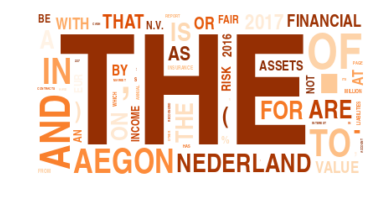

In [143]:
# Let's see
countAndSave(words, '_bag_of_words')

## Do some basic processing
* Ignore punctuation
* Ignore case
* Remove stopwords

In [144]:
# Convert all to lowercase
words = [w.lower() for w in words]

# Remove punctuation
words = [re.sub('[^A-Za-z0-9]', '', w) for w in words]
words = list(filter(None, words))

# Remove stopwords
from nltk.corpus import stopwords
words = [w for w in words if w not in stopwords.words(language)]

aegon        1594
nederland    1021
2017          700
financial     607
value         498
assets        427
nv            426
risk          405
fair          382
income        375
dtype: int64


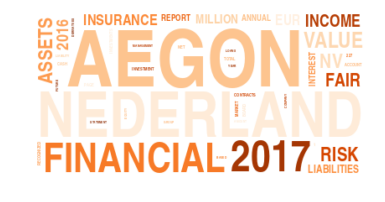

In [146]:
# Let's go!
countAndSave(words, '_basic_processing')